# Übung 10

**Gruppenname: TSRI**

- Christian Rene Thelen @cortex359
- Leonard Schiel @leo_paticumbum
- Marine Raimbault @Marine Raimbault
- Alexander Ivanets @sandrium

### In dieser Übung ...

... werden wir intensiv mit einem Datensatz arbeiten und uns mit ihm vertraut machen.

### 10.1 Datenaufbereitung (Corona Pandemie)

In dieser Übungsaufgabe wird es darum gehen, weitere Praxiserfahrung bei der Datenaufbereitung zu sammeln. Wie Sie im Rahmen der Veranstaltung gelernt haben, lässt sich Datenaufbereitung nur schwer auf Vorlesungsfolien vermitteln, sondern muss praktisch geübt werden. Sie werden Daten der Corona-Pandemie analysieren. Die Daten stammen vom Robert Koch Institut.

- Ziel dieser Übung ist es, den Datensatz des Robert Koch Instituts so aufzubereiten, dass Sie am Ende einen Pandas DataFrame vorliegen haben, der die Anzahl Neuinfizierter pro Tag und Bundesland enthält.

**Ihre Aufgaben**


(1) Da der Datensatz des Robert Koch Instituts mittlerweile leider nicht mehr online verfügbar ist, haben wir Ihnen [hier](https://data.bialonski.de/ds/RKI_COVID-19.zip) einen Export der Daten (aus dem März 2022) hinterlegt.

- Die heruntergeladene Datei ist mehrere hundert Megabytes groß. Um Plattenplatz zu sparen, ist es empfehlenswert, die Datei in ihrem gezippten Format zu belassen. Die Pandas-Bibliothek, mit der wir die Daten später untersuchen werden, kann [gezippte Dateien direkt importieren](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).


(2) Importieren Sie die Daten in einen Pandas DataFrame, den Sie `df_germany` nennen.

In [2]:
import pandas as pd

df_germany: pd.DataFrame = pd.read_csv("RKI_COVID-19.zip")

(3) Untersuchen Sie den importierten DataFrame:

- Welche Spalten weist der DataFrame auf?
- Welche Information enthält eine Zeile des DataFrames?
- In welcher Spalte ist die Information über die Anzahl der Neuinfizierten enthalten?

In [3]:
print(f'Der DataFrame hat die folgenden Spalten:\n{list(df_germany.columns)}')
print(f'und die Zeilen sind Meldungen an das RKI, wobei die Spalte `AnzahlFall` die Anzahl der Neuinfizierten seit der letzten Meldung enthält.')

Der DataFrame hat die folgenden Spalten:
['IdBundesland', 'Bundesland', 'IdLandkreis', 'Landkreis', 'Altersgruppe', 'Altersgruppe2', 'Geschlecht', 'Meldedatum', 'Refdatum', 'IstErkrankungsbeginn', 'NeuerFall', 'NeuerTodesfall', 'NeuGenesen', 'AnzahlFall', 'AnzahlTodesfall', 'AnzahlGenesen', 'Datenstand', 'ObjectId']
und die Zeilen sind Meldungen an das RKI, wobei die Spalte `AnzahlFall` die Anzahl der Neuinfizierten seit der letzten Meldung enthält.


Die Fallzahlendaten enthalten die in der folgenden Tabelle abgebildeten Merkmale und deren Ausprägungen:

| Merkmal | Ausprägung | Erläuterung |
| -------- | -------- | -------- |
| IdLandkreis   | 1001 bis 16077    | Identifikationsnummer des Landkreises basierend auf dem Amtlichen Gemeindeschlüssel (AGS) zuzüglich der 12 Bezirke Berlins (11001 bis 11012); Gebietsstand: 30.06.2020 (2. Quartal) |
|Geschlecht| W, M, unbekannt | Geschlecht der Fallgruppe: weiblich (W), männlich (M) und (unbekannt)|
| Altersgruppe | A00-A04, A05-A14, A15-A34, A35-A59, A60-A79, A80+, unbekannt | Altersspanne der in der Gruppe enthaltenen Fälle, stratifiziert nach 0-4 Jahren, 5-14 Jahren, 15-34 Jahren, 35-59 Jahren, 60-79 Jahren, 80+ Jahren sowie unbekannt
|Meldedatum | JJJJ-MM-TT | Datum, wann der Fall dem Gesundheitsamt bekannt geworden ist. JJJJ entspricht der Jahreszahl, MM dem Monat und TT dem Tag. 
|Refdatum | JJJJ-MM-TT | Datum des Erkrankungsbeginns. Wenn das nicht bekannt ist, das Meldedatum.
| IstErkrankungsbeginn| 0, 1 |  1: Refdatum ist der Erkrankungsbeginn 0: Refdatum ist das Meldedatum  |
|AnzahlFall | Ganze Zahl | Anzahl der gemeldeten Fälle in der entsprechenden Fallgruppe <br> Für NeuerFall = -1, ist die Anzahl negativ: Es handelt sich um eine Korrektur der Fallgruppe, die angibt, wie viele Infektionen zu viel gemeldet worden sind |
|AnzahlTodesfall | Ganze Zahl | Anzahl der gemeldeten Todesfälle in der entsprechenden Fallgruppe <br> Für NeuerTodesfall = -1, ist die Anzahl negativ: Es handelt sich um eine Korrektur der Fallgruppe, die angibt, wie viele Todesfälle zu viel gemeldet worden sind|
|AnzahlGenesen | Ganze Zahl | Anzahl der genesenen Fälle in der entsprechenden Fallgruppe <br> Für NeuGenesen = -1, ist die Anzahl negativ: Es handelt sich um eine Korrektur der Fallgruppe, die angibt, wie viele genesene Fälle zu viel gemeldet worden sind|
|NeuerFall, NeuerTodesfall, NeuGenesen | 0, 1, -1| 0 : Fälle der Gruppe sind in der Publikation für den aktuellen Tag und in der für den Vortag enthalten. Das bedeutet diese Fälle sind seit mehr als einem Tag bekannt. <br> 1 : Fälle der Gruppe sind erstmals in der aktuellen Publikation enthalten. Das heißt, es sind für den Publikationstag neu übermittelte oder entsprechend neu bewertete Fälle.<br> -1: Fälle der Gruppe sind in der Publikation des Vortags enthalten, werden jedoch nach dem aktuellen Tag aus den Fallzahlendaten entfernt. Das heißt, es sind Fälle die ab dem aktuellen Tag wegfallen. Eine solche Fallgruppe kann beispielsweise durch fälschliche Meldungen entstehen, die so als Korrektur angezeigt werden. |
| NeuerTodesfall, NeuGenesen | -9 | Fälle in der Gruppe sind weder in der Publikation für den aktuellen Tag, noch in der Publikation des Vortags, als genesen ("NeuGenesen") oder verstorben ("NeuerTodesfall") gemeldet. Das bedeutet, dass zu den Fällen in der Gruppe keine Information über den Gesundheitsverlauf der Infektion bekannt ist. Das ist zum Beispiel häufig der Fall, wenn eine Fallgruppe gerade erst als infiziert gemeldet worden ist. | 

> Quelle: Robert Koch-Institut (2023): SARS-CoV-2 Infektionen in Deutschland, Berlin: Zenodo. DOI:10.5281/zenodo.4681153.

Die Anzahl der Neuinfektionen ist also die `AnzahlFall` für die Fallgruppe in der `NeuerFall == 1` ist. 

(4) Setzen Sie die Spalte `Meldedatum` auf den Typ datetime Index.

In [4]:
df_germany["Meldedatum"] = pd.to_datetime(df_germany["Meldedatum"])
df_germany.sort_values("Meldedatum", inplace=True)
df_germany[df_germany["NeuerFall"] == 1]

,IdBundesland,Bundesland,IdLandkreis,Landkreis,Altersgruppe,Altersgruppe2,Geschlecht,Meldedatum,Refdatum,IstErkrankungsbeginn,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,Datenstand,ObjectId
779469,5,Nordrhein-Westfalen,5162,LK Rhein-Kreis Neuss,A35-A59,Nicht übermittelt,W,2020-03-28 00:00:00+00:00,2020/03/28 00:00:00+00,0,1,-9,1,1,0,1,"22.03.2022, 00:00 Uhr",779470
2326835,8,Baden-Württemberg,8336,LK Lörrach,A35-A59,Nicht übermittelt,W,2020-07-13 00:00:00+00:00,2020/07/06 00:00:00+00,1,1,-9,1,1,0,1,"22.03.2022, 00:00 Uhr",2326836
1947044,8,Baden-Württemberg,8115,LK Böblingen,A05-A14,Nicht übermittelt,M,2020-07-18 00:00:00+00:00,2020/07/18 00:00:00+00,0,1,-9,1,1,0,1,"22.03.2022, 00:00 Uhr",1947045
1954754,8,Baden-Württemberg,8115,LK Böblingen,A35-A59,Nicht übermittelt,W,2020-10-07 00:00:00+00:00,2020/10/07 00:00:00+00,0,1,-9,1,1,0,1,"22.03.2022, 00:00 Uhr",1954755
1999774,8,Baden-Württemberg,8118,LK Ludwigsburg,A15-A34,Nicht übermittelt,W,2020-10-10 00:00:00+00:00,2020/10/10 00:00:00+00,0,1,-9,1,1,0,1,"22.03.2022, 00:00 Uhr",1999775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727733,7,Rheinland-Pfalz,7133,LK Bad Kreuznach,A80+,Nicht übermittelt,M,2022-03-21 00:00:00+00:00,2022/03/21 00:00:00+00,0,1,-9,-9,7,0,0,"22.03.2022, 00:00 Uhr",1727734
4037517,14,Sachsen,14626,LK Görlitz,A60-A79,Nicht übermittelt,M,2022-03-21 00:00:00+00:00,2022/03/21 00:00:00+00,0,1,-9,-9,2,0,0,"22.03.2022, 00:00 Uhr",4037518
1728505,7,Rheinland-Pfalz,7133,LK Bad Kreuznach,A60-A79,Nicht übermittelt,W,2022-03-21 00:00:00+00:00,2022/03/21 00:00:00+00,0,1,-9,-9,46,0,0,"22.03.2022, 00:00 Uhr",1728506
37710,1,Schleswig-Holstein,1053,LK Herzogtum Lauenburg,A05-A14,Nicht übermittelt,W,2022-03-21 00:00:00+00:00,2022/03/21 00:00:00+00,0,1,-9,-9,2,0,0,"22.03.2022, 00:00 Uhr",37711


(5) Erstellen Sie aus dem alten DataFrame einen neuen DataFrame `covid`, der folgende Spalten enthält:

- Erste Spalte: `Meldedatum`
- 16 weitere Spalten, die jeweils nach einem Bundesland benannt sind
- letzte Spalte: `Deutschland`

Der DataFrame enthält also die Anzahl der Neuinfizierten pro Tag (Meldedatum) und Bundesland sowie für die gesamte Bundesrepublik (Spalte Deutschland).

- Beachten Sie: Vermutlich werden Sie für die Lösung dieser Teilaufgabe etwas mehr Zeit benötigen und im Internet in der Pandas Dokumentation recherchieren müssen.


In [5]:
bundeslaender = df_germany["Bundesland"].unique().tolist()
covid: pd.DataFrame = pd.pivot_table(df_germany[df_germany["NeuerFall"] == 1], values="AnzahlFall", index="Meldedatum", columns="Bundesland", aggfunc="sum")
covid["Deutschland"] = covid[bundeslaender].sum(axis="columns")
covid.head(10)

Bundesland,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,Deutschland
Meldedatum,,,,,,,,,,,,,,,,,
2020-03-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-07-13 00:00:00+00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-07-18 00:00:00+00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-10-07 00:00:00+00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-10-10 00:00:00+00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-10-27 00:00:00+00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-11-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
2020-11-13 00:00:00+00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-11-27 00:00:00+00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


(6) Visualisieren Sie die Anzahl der Neuinfizierten in Nordrhein-Westfalen sowie in der gesamten Bundesrepublik als Funktion der Zeit.

- Die x-Achse ist mit "Meldedatum" beschriftet.
- Auf der x-Achse stehen Datumsangaben (z.B: '2020-03-17'), keine bloßen Integers.
- Der Titel der Abbildung lautet "Anzahl Neuinfektionen".

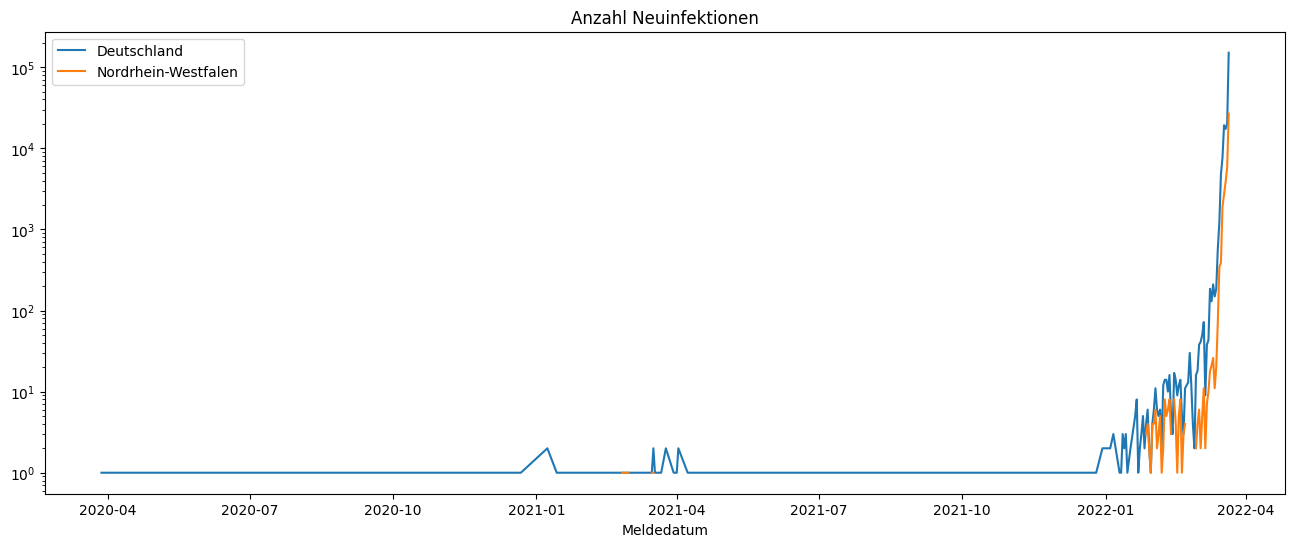

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.xlabel("Meldedatum")
plt.yscale("log")
plt.title("Anzahl Neuinfektionen")
plt.plot(covid["Deutschland"], label="Deutschland")
plt.plot(covid["Nordrhein-Westfalen"], label="Nordrhein-Westfalen")
plt.legend()
plt.show()

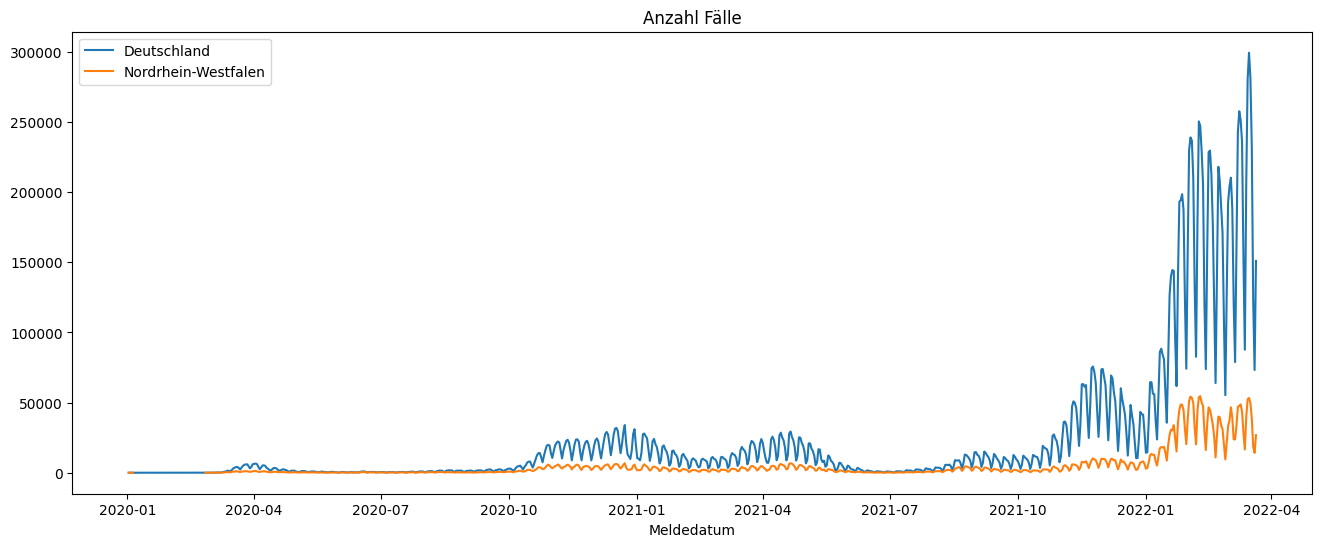

In [7]:
covid: pd.DataFrame = pd.pivot_table(df_germany, values="AnzahlFall", index="Meldedatum", columns="Bundesland", aggfunc="sum")
covid["Deutschland"] = covid[bundeslaender].sum(axis="columns")

plt.figure(figsize=(16, 6))
plt.xlabel("Meldedatum")
plt.title("Anzahl Fälle")
plt.plot(covid["Deutschland"], label="Deutschland")
plt.plot(covid["Nordrhein-Westfalen"], label="Nordrhein-Westfalen")
plt.legend()
plt.show()

### 10.2 Exploration (Corona Pandemie)

Sie werden die Daten aus der vorangegangenen Aufgabe in dieser Aufgabe analysieren.

- Diese Aufgabe ist freier gehalten als die vorangegangene Aufgabe.


**Schritte**

(1) Importieren Sie die Daten.

In [8]:
df_germany: pd.DataFrame = pd.read_csv("RKI_COVID-19.zip")

df_germany["Meldedatum"] = pd.to_datetime(df_germany["Meldedatum"])
df_germany.set_index("Meldedatum", inplace=True)

In [9]:
# Quelle: https://github.com/owid/covid-19-data/tree/master/public/data
#!wget https://covid.ourworldindata.org/data/owid-covid-data.csv

In [10]:
df_owid: pd.DataFrame = pd.read_csv("owid-covid-data.csv")
df_owid["date"] = pd.to_datetime(df_owid["date"])

In [11]:
df_owid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

(2) Untersuchen Sie die Daten: **Erzeugen Sie Fragen** an die Daten und notieren Sie sie hier.

- Welche Bundesländer hatten die meisten Fälle?
- Wie oft kam es zu Falschmeldungen / Korrekturen?
- Wie verhalten sich die Fallzahlen im Verlauf der Pandemie zu den Todeszahlen und den Zahlen der Genesenen?

(3) **Untersuchen** Sie Ihre Fragen mit den angegebenen Daten und **visualisieren** Sie bzw. **beschreiben** Sie Ihre Erkenntnisse.

- Hinweis: Ich lade Sie herzlich dazu ein, weitere Datenquellen aus dem Netz zu Ihren Untersuchungen hinzuziehen. Geben Sie in diesem Falle Ihre Datenquellen hier an.


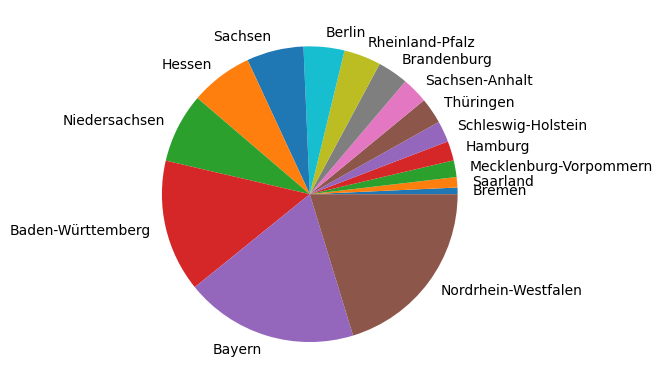

In [13]:
covid.sum()[:-1].sort_values().plot(kind="pie")
plt.show()

In [14]:
print(df_germany[df_germany["NeuerFall"] == -1]["AnzahlFall"].sum())
print(df_germany[df_germany["NeuGenesen"] == -1]["AnzahlGenesen"].sum())
print(df_germany[df_germany["NeuerTodesfall"] == -1]["AnzahlTodesfall"].sum())

-1137
-661
-3


Die Menge der korrigierten Fälle ist überaschaubar und fällt in der Gesamtbetrachtung kaum auf.

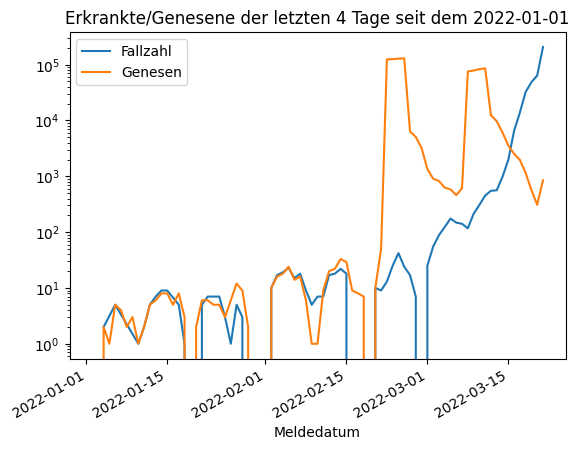

In [15]:
bundeslaender = df_germany["Bundesland"].unique().tolist()

covid_fall: pd.DataFrame = pd.pivot_table(df_germany[df_germany["NeuerFall"] != 0], values="AnzahlFall", index="Meldedatum", columns="Bundesland", aggfunc="sum")
covid_fall["Deutschland"] = covid_fall[bundeslaender].sum(axis="columns")

covid_tod: pd.DataFrame = pd.pivot_table(df_germany[df_germany["NeuerTodesfall"] != 0], values="AnzahlTodesfall", index="Meldedatum", columns="Bundesland", aggfunc="sum")
covid_tod["Deutschland"] = covid_tod[bundeslaender].sum(axis="columns")

covid_genesen: pd.DataFrame = pd.pivot_table(df_germany[df_germany["NeuGenesen"] != 0], values="AnzahlGenesen", index="Meldedatum", columns="Bundesland", aggfunc="sum")
covid_genesen["Deutschland"] = covid_genesen[bundeslaender].sum(axis="columns")


startdatum = "2022-01-01"
plt.title(f"Erkrankte/Genesene der letzten 4 Tage seit dem {startdatum}")
covid_fall[covid_fall.index > startdatum].rolling('4D')["Deutschland"].sum().plot(label="Fallzahl")
covid_genesen[covid_genesen.index > startdatum].rolling('4D')["Deutschland"].sum().plot(label="Genesen")
plt.yscale("log")
plt.legend()
plt.show()

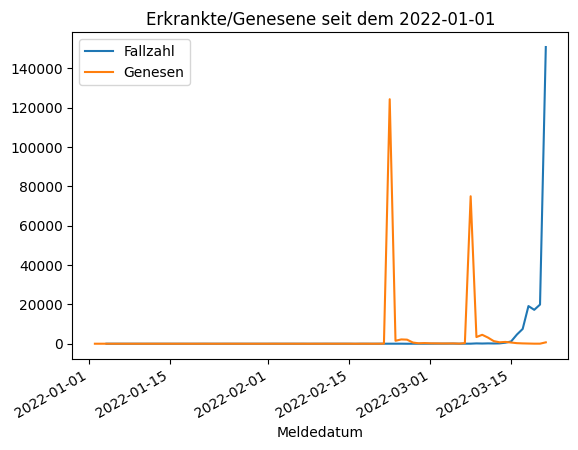

In [16]:
bundeslaender = df_germany["Bundesland"].unique().tolist()

covid_fall: pd.DataFrame = pd.pivot_table(df_germany[df_germany["NeuerFall"] != 0], values="AnzahlFall", index="Meldedatum", columns="Bundesland", aggfunc="sum")
covid_fall["Deutschland"] = covid_fall[bundeslaender].sum(axis="columns")

covid_tod: pd.DataFrame = pd.pivot_table(df_germany[df_germany["NeuerTodesfall"] != 0], values="AnzahlTodesfall", index="Meldedatum", columns="Bundesland", aggfunc="sum")
covid_tod["Deutschland"] = covid_tod[bundeslaender].sum(axis="columns")

covid_genesen: pd.DataFrame = pd.pivot_table(df_germany[df_germany["NeuGenesen"] != 0], values="AnzahlGenesen", index="Meldedatum", columns="Bundesland", aggfunc="sum")
covid_genesen["Deutschland"] = covid_genesen[bundeslaender].sum(axis="columns")


startdatum = "2022-01-01"
plt.title(f"Erkrankte/Genesene seit dem {startdatum}")
covid_fall[covid_fall.index > startdatum]["Deutschland"].plot(label="Fallzahl")
covid_genesen[covid_genesen.index > startdatum]["Deutschland"].plot(label="Genesen")
#plt.yscale("log")
plt.legend()
plt.show()

<Axes: xlabel='Meldedatum'>

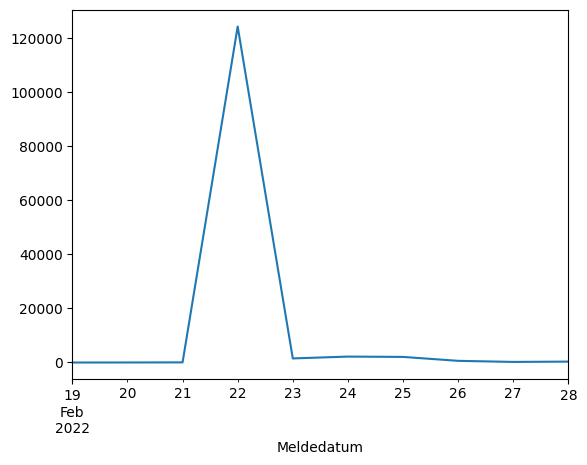

In [17]:
covid_genesen[("2022-03-01" > covid_genesen.index) & (covid_genesen.index > "2022-02-18")]["Deutschland"].plot(label="Genesen")

Was passiert da?

Eigentlich ist zu erwarten, dass die Anzahl der Genesenen einen sehr ähnlichen Verlauf hat, wie der gemeldeten Erkrankungen, jedoch mit einer Phasenverschiebung um 1-2 Wochen. Der rasante Anstieg der Genesenen, den wir im Zeitraum ab dem 22.02.2022 feststellen, muss demnach eine andere Ursache haben.

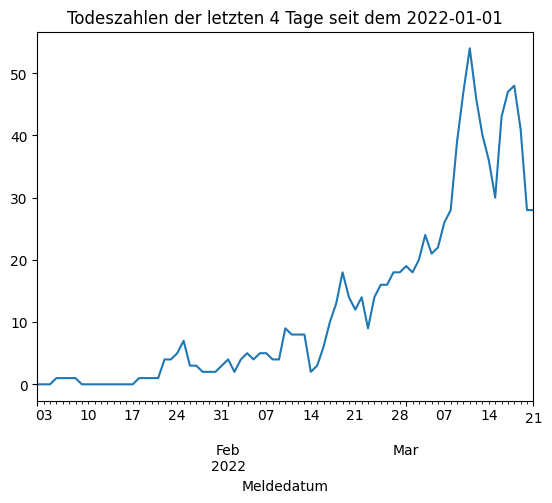

In [18]:
#covid_fall[covid_fall.index > startdatum]["Deutschland"].plot()
#covid_genesen[covid_genesen.index > startdatum]["Deutschland"].plot()
plt.title(f"Todeszahlen der letzten 4 Tage seit dem {startdatum}")
covid_tod[covid_tod.index > startdatum].rolling('4D')["Deutschland"].sum().plot()
plt.show()


Wir betrachten nun die Daten vom Our World in Data.

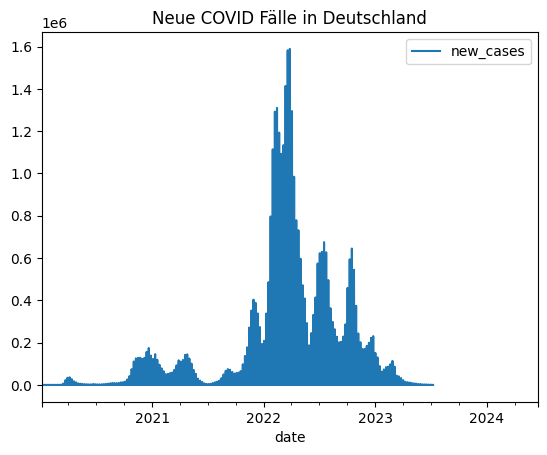

In [19]:
df_owid[df_owid["location"] == "Germany"].plot(x="date", y="new_cases")
plt.title("Neue COVID Fälle in Deutschland")
plt.show()

<Axes: xlabel='date'>

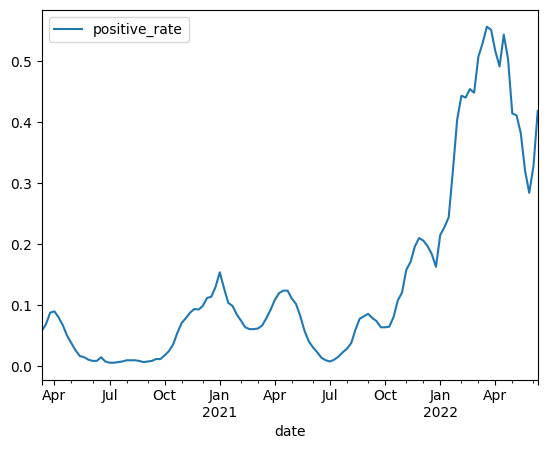

In [20]:
df_owid[df_owid["location"] == "Germany"][['date', 'positive_rate']].dropna().plot(x='date', y='positive_rate')

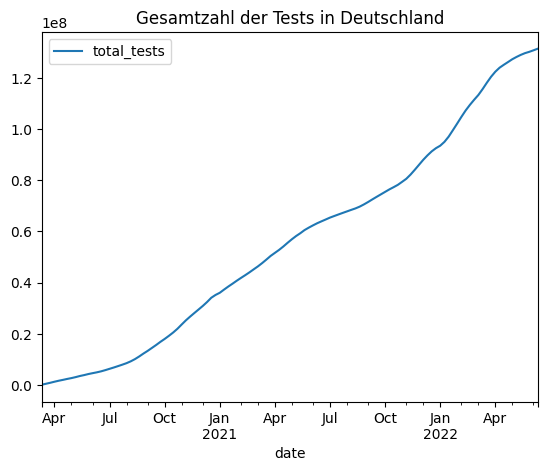

In [21]:
df_owid[df_owid["location"] == "Germany"][['date', 'total_tests']].dropna().plot(x='date', y='total_tests')
plt.title("Gesamtzahl der Tests in Deutschland")
plt.show()

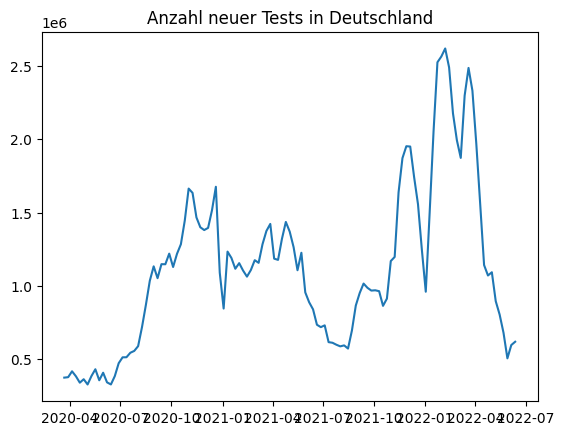

In [22]:
tests_in_de = df_owid[df_owid["location"] == "Germany"][['date', 'total_tests']].dropna()
tests_in_de.set_index("date", inplace=True)

plt.title("Anzahl neuer Tests in Deutschland")
plt.plot(tests_in_de - tests_in_de.shift(1, axis=0))
plt.show()

Die Anzahl neuer Tests war im Jan. 2022 etwas eingebrochen und ist im Feb. 2020 wieder hochgeschnellt, aber ob das ausreichend ist, um die große Anzahl „plötzlich“ neu Genesener zu erklären, ist nicht ganz klar.